# Fase 3
Visualizações podem nos ajudar bastante a entender os dados. Por isso, o
objetivo dessa etapa é criar pelo menos três tipos de gráficos diferentes utilizando
os dados dos conjuntos de dados escolhidos.
#### Sugestões de gráficos:
- Gráfico de dispersão para analisar correlação e tendências de duas variáveis
- Histograma para entender frequências dos dados
- Gráfico de barra ou linha de acordo com o tipo de dado trabalhado

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df_quant = pd.read_csv('datasets/DrugsDatasetQuant.csv', index_col='Unnamed: 0')
df_means =  pd.read_csv('datasets/Drug_Consumption.csv')

In [4]:
df_means

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,...,4,0,2,0,2,3,0,4,0,0
1,1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,...,0,0,0,0,0,0,1,0,0,0
2,2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,...,0,0,2,0,0,0,0,2,0,0
3,3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,...,1,0,0,1,0,0,2,2,0,0
4,4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,...,0,0,0,3,3,0,0,0,0,5
1880,1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,...,2,0,0,3,5,4,4,5,0,0
1881,1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,...,4,0,2,0,2,0,2,6,0,0
1882,1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,...,3,0,0,3,3,0,3,4,0,0


<AxesSubplot:xlabel='Age', ylabel='Count'>

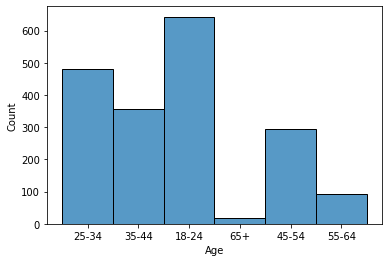

In [5]:
sns.histplot(df_means['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

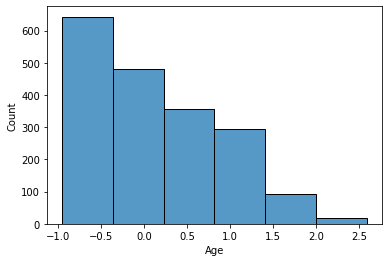

In [6]:
sns.histplot(df_quant['Age'], bins = 6)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

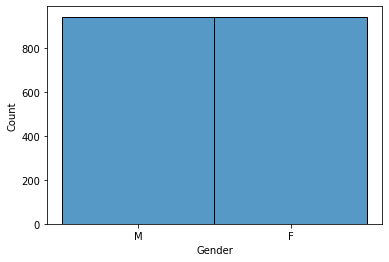

In [7]:
sns.histplot(df_means['Gender'])

<AxesSubplot:xlabel='Count', ylabel='Education'>

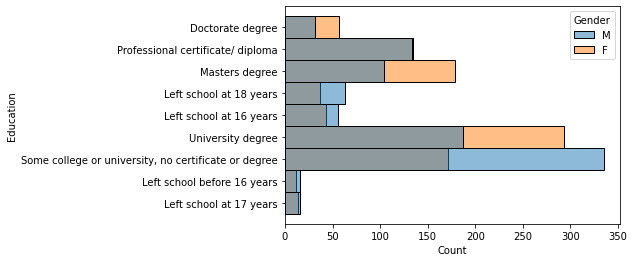

In [8]:
sns.histplot(y = df_means['Education'], hue = df_means['Gender'], alpha = .5)

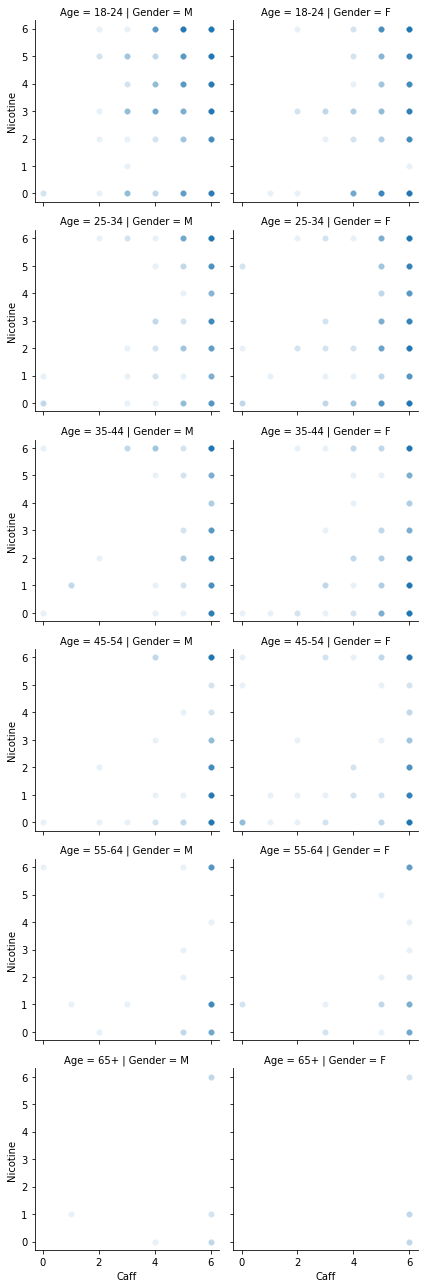

In [9]:
g = sns.FacetGrid(df_means, col="Gender", row = "Age", row_order=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
g.map(sns.scatterplot, "Caff", "Nicotine", alpha=.1)

In [10]:
if 'Unnamed: 0' in df_means.columns:
    df_means = df_means.drop(columns=['Unnamed: 0'])
df_means

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,3,3,0,0,0,0,5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,2,0,0,3,5,4,4,5,0,0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,4,0,2,0,2,0,2,6,0,0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,3,0,0,3,3,0,3,4,0,0


In [11]:
df_quant

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,3,3,0,0,0,0,5
1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,2,0,0,3,5,4,4,5,0,0
1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,4,0,2,0,2,0,2,6,0,0
1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,3,0,0,3,3,0,3,4,0,0


In [12]:
df = {'M' : df_means.query("Gender == 'M'").loc[:, "Alcohol":"VSA"],
      'F' : df_means.query("Gender == 'F'").loc[:, "Alcohol":"VSA"]}

df['M']['Age'] = df_quant.query("Gender == -0.48246")["Age"]
df['M'] = df['M'].set_index(pd.Index(range(len(df['M']))))

df['F']['Age'] = df_quant.query("Gender == 0.48246")["Age"]
df['F'] = df['F'].set_index(pd.Index(range(len(df['F']))))



In [13]:
def make_heatmap_bydrug(gender ,drug):
    data = df[gender].loc[:,['Age',drug]]
    l = (data['Age'].value_counts().index)
    c = data[drug].value_counts().index.sort_values()
    newdata = []

    p = data.value_counts()
    temp = []
    for i in l:
        for j in c:
            a = eval(f'({float(i)}, {int(j)})')
            if a in (list(p.index)):
                temp.append(p[a].astype(int))
            else:
                temp.append(0)
        newdata.append(temp)
        temp = []

    return pd.DataFrame(newdata, index = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])


In [21]:
MaleCaff = make_heatmap_bydrug('M', 'Caff')
FemaleCaff = make_heatmap_bydrug('F', 'Caff')
MaleAlc = make_heatmap_bydrug('M', 'Alcohol')
FemaleAlc = make_heatmap_bydrug('F', 'Alcohol')
FemaleNicote = make_heatmap_bydrug('F', 'Nicotine')
FemaleAlc

,0,1,2,3,4,5,6
18-24,3,2,8,34,45,136,66
25-34,6,0,5,23,45,106,52
35-44,3,5,10,14,31,79,59
45-54,1,6,6,15,26,64,40
55-64,1,4,2,5,4,17,10
65+,1,0,1,2,1,0,3


Text(33.0, 0.5, 'Idade')

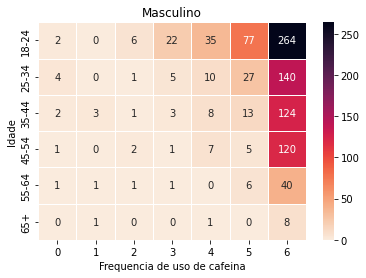

In [15]:
v = sns.heatmap(MaleCaff, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Masculino')
v.set_xlabel('Frequencia de uso de cafeina')
v.set_ylabel('Idade')

Text(33.0, 0.5, 'Idade')

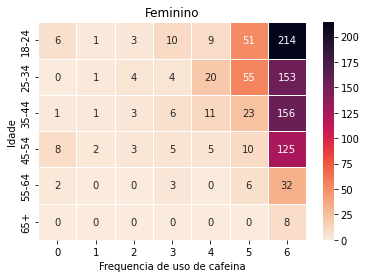

In [16]:
Fc = sns.heatmap(FemaleCaff, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
Fc.set_title('Feminino')
Fc.set_xlabel('Frequencia de uso de cafeina')
Fc.set_ylabel('Idade')

Text(33.0, 0.5, 'Idade')

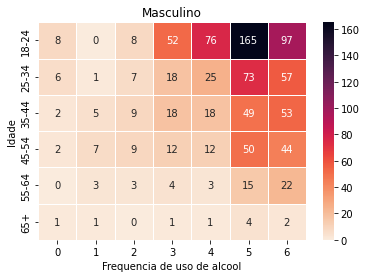

In [17]:
v = sns.heatmap(MaleAlc, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Masculino')
v.set_xlabel('Frequencia de uso de alcool')
v.set_ylabel('Idade')

Text(33.0, 0.5, 'Idade')

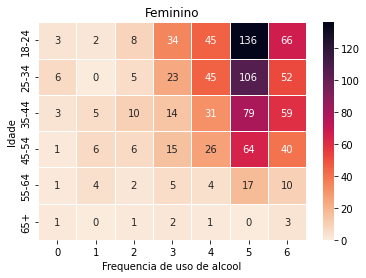

In [20]:
v = sns.heatmap(FemaleAlc, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Feminino')
v.set_xlabel('Frequencia de uso de alcool')
v.set_ylabel('Idade')

Text(33.0, 0.5, 'Idade')

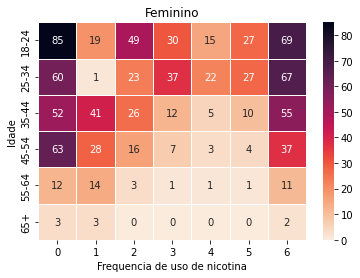

In [24]:
v = sns.heatmap(FemaleNicote, cmap="rocket_r", linewidths=.5, annot= True, fmt = "d")
v.set_title('Feminino')
v.set_xlabel('Frequencia de uso de nicotina')
v.set_ylabel('Idade')

- CL0 Never Used
- CL1 Used over a Decade Ago
- CL2 Used in Last Decade
- CL3 Used in Last Year 59
- CL4 Used in Last Month
- CL5 Used in Last Week
- CL6 Used in Last Day

# Fase 4


O objetivo dessa etapa é aplicar o K-means nos conjuntos de dados usados no
projeto para descobrir possíveis grupos.</br>
Testem diferentes características (colunas) e diferentes números de grupos (valor
de K).</br>
Com os resultados em mãos, respondam em células Markdown no notebook:
- Algum padrão foi detectado? Cite algumas descobertas que chamaram
atenção.
- Alguma nova pergunta foi descoberta ao analisar os agrupamentos? Se
sim, cite quais foram.

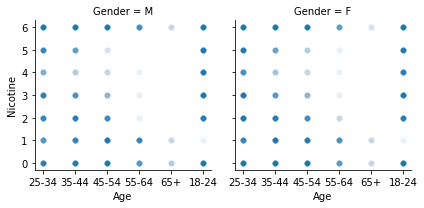

In [18]:
g = sns.FacetGrid(df_means, col="Gender")
g.map(sns.scatterplot, "Age", "Nicotine", alpha=.1)

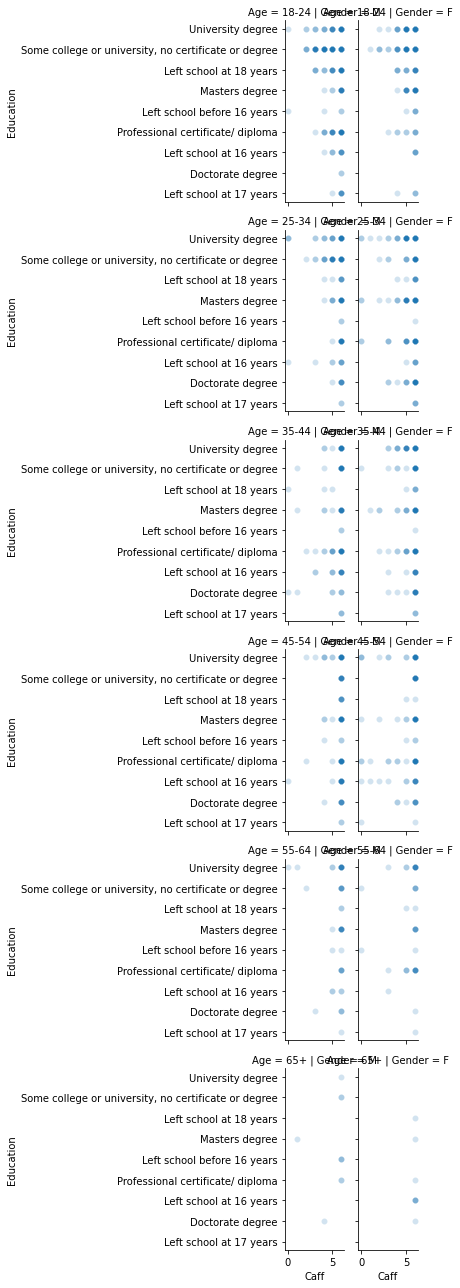

In [19]:
g = sns.FacetGrid(df_means, col="Gender", row = "Age", row_order=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
g.map(sns.scatterplot, "Caff", "Education", alpha=.2)